<a href="https://colab.research.google.com/github/doukansurel/Machine-Learning-worksheet/blob/main/Transfer_Learning_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
tf.__version__

'2.12.0'

In [2]:
import os

# Kaggle kullanıcı adı ve API token'ınızı buraya yapıştırın
kaggle_username = "doukansrel"
kaggle_api_token = "335bf9b6528125c146751b220118d842"

# Kaggle API token'ını işletim sistemi ortamına ekleyin
os.environ['KAGGLE_USERNAME'] = kaggle_username
os.environ['KAGGLE_KEY'] = kaggle_api_token


In [ ]:
!kaggle datasets download -d sartajbhuvaji/brain-tumor-classification-mri

In [ ]:
!unzip brain-tumor-classification-mri.zip

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

In [6]:
train_dir = os.path.join('Training')
validation_dir = os.path.join('Testing')

BATCH_SIZE = 32
IMG_SIZE = (160, 160)

In [7]:
train_dataset = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                            shuffle=True,
                                                            label_mode="int",
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMG_SIZE)
validation_dataset = tf.keras.utils.image_dataset_from_directory(validation_dir,
                                                                 shuffle=True,
                                                                 label_mode="int",
                                                                 batch_size=BATCH_SIZE,
                                                                 image_size=IMG_SIZE)

Found 2870 files belonging to 4 classes.
Found 394 files belonging to 4 classes.


In [8]:
print(train_dataset.element_spec)
print(validation_dataset.element_spec)

(TensorSpec(shape=(None, 160, 160, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))
(TensorSpec(shape=(None, 160, 160, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))


In [9]:
# import tensorflow as tf

# # Assuming you have already created train_dataset and validation_dataset

# # Use tf.squeeze() to remove the additional None dimension
# train_dataset = train_dataset.map(lambda x, y: (tf.squeeze(x, axis=1), y))
# validation_dataset = validation_dataset.map(lambda x, y: (tf.squeeze(x, axis=1), y))

# # Print the element spec to verify the shapes
# print(train_dataset.element_spec)
# print(validation_dataset.element_spec)


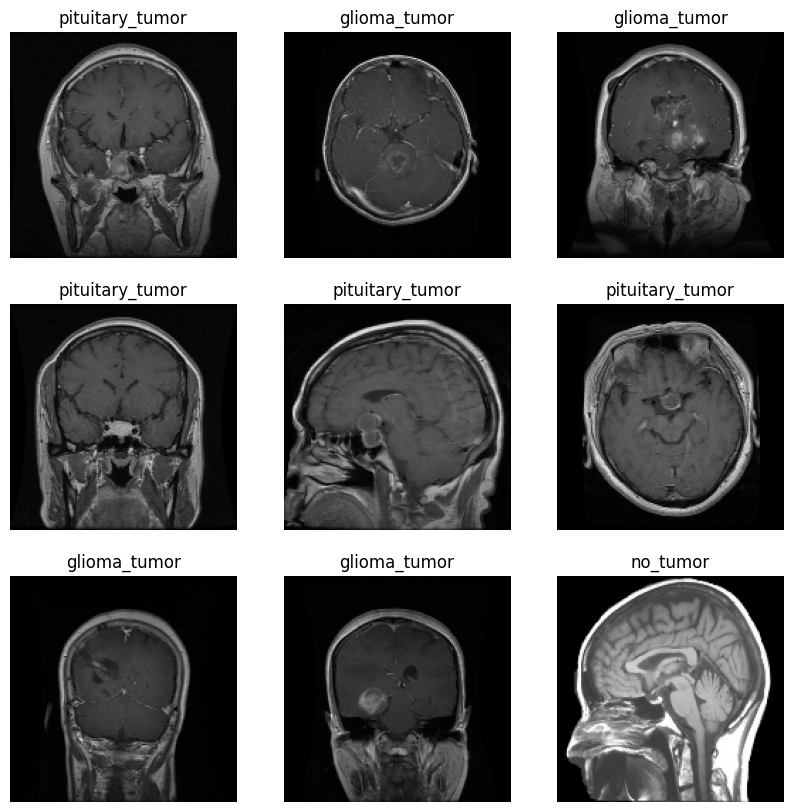

In [10]:
import matplotlib.pyplot as plt

class_names = train_dataset.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predicted_class_index = int(labels[i])  # Convert the label tensor to integer
        predicted_class_name = class_names[predicted_class_index]
        plt.title(predicted_class_name)
        plt.axis("off")

plt.show()

In [11]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip('horizontal'),
  tf.keras.layers.RandomRotation(0.2),
])

In [12]:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

In [13]:
IMG_SHAPE = IMG_SIZE + (3,)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

9406464/9406464 [==============================] - 1s 0us/step


In [14]:
inputs = tf.keras.Input(shape=(160, 160, 3))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = tf.keras.layers.Dense(4, activation='softmax')(x)
model = tf.keras.Model(inputs, outputs)


In [15]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [16]:
initial_epochs = 10

In [17]:
history = model.fit(train_dataset,
                    epochs=initial_epochs,
                    validation_data=validation_dataset)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


90/90 [==============================] - 54s 135ms/step - loss: 0.7923 - accuracy: 0.6732 - val_loss: 1.4302 - val_accuracy: 0.5508
Epoch 2/10
90/90 [==============================] - 9s 99ms/step - loss: 0.4711 - accuracy: 0.8293 - val_loss: 1.0917 - val_accuracy: 0.6396
Epoch 3/10
90/90 [==============================] - 9s 92ms/step - loss: 0.3158 - accuracy: 0.8840 - val_loss: 1.0071 - val_accuracy: 0.7157
Epoch 4/10
90/90 [==============================] - 9s 101ms/step - loss: 0.2359 - accuracy: 0.9125 - val_loss: 1.1717 - val_accuracy: 0.6954
Epoch 5/10
90/90 [==============================] - 9s 102ms/step - loss: 0.2163 - accuracy: 0.9223 - val_loss: 1.2045 - val_accuracy: 0.7690
Epoch 6/10
90/90 [==============================] - 9s 99ms/step - loss: 0.1755 - accuracy: 0.9328 - val_loss: 1.4925 - val_accuracy: 0.7386
Epoch 7/10
90/90 [==============================] - 9s 94ms/step - loss: 0.1485 - accuracy: 0.9467 - val_loss: 0.9618 - val_accuracy: 0.7665
Epoch 8/10
90/90 [==

In [18]:
for images, labels in train_dataset.take(1):
    print(images.shape)

(32, 160, 160, 3)


In [19]:
model.evaluate(validation_dataset)

13/13 [==============================] - 1s 27ms/step - loss: 1.4208 - accuracy: 0.7589


[1.420780897140503, 0.7588832378387451]

In [20]:
predictions = model.predict(validation_dataset)

13/13 [==============================] - 1s 28ms/step


In [21]:
predictions

array([[6.46289163e-06, 9.99741137e-01, 2.29685858e-04, 2.27703022e-05],
       [1.32264495e-05, 2.53536087e-03, 9.97429907e-01, 2.15292930e-05],
       [1.02573758e-04, 4.90748207e-04, 7.49083579e-01, 2.50323147e-01],
       ...,
       [6.49993867e-03, 2.66622665e-04, 9.85742331e-01, 7.49115786e-03],
       [3.87517912e-06, 5.85491594e-04, 9.99382854e-01, 2.77700456e-05],
       [6.12767518e-01, 3.76660019e-01, 7.77445920e-03, 2.79798592e-03]],
      dtype=float32)

In [22]:
np.argmax(predictions[0])

1

In [23]:
predictions[0]

array([6.4628916e-06, 9.9974114e-01, 2.2968586e-04, 2.2770302e-05],
      dtype=float32)

In [24]:
# Assuming you have defined the validation_dataset as mentioned in the previous code

# Create lists to store images and labels
validation_images = []
validation_labels = []

# Iterate through the validation_dataset to extract images and labels
for images, labels in validation_dataset:
    validation_images.append(images)
    validation_labels.append(labels)

# Concatenate the list of tensors into a single tensor (if needed)
validation_images = tf.concat(validation_images, axis=0)
validation_labels = tf.concat(validation_labels, axis=0)

# Print the shapes of the extracted images and labels
print("Validation images shape:", validation_images.shape)
print("Validation labels shape:", validation_labels.shape)


Validation images shape: (394, 160, 160, 3)
Validation labels shape: (394,)


In [25]:
validation_labels

<tf.Tensor: shape=(394,), dtype=int32, numpy=
array([0, 1, 3, 0, 1, 3, 1, 1, 1, 0, 1, 1, 0, 3, 1, 0, 1, 2, 2, 3, 0, 3,
       2, 2, 2, 0, 0, 2, 2, 1, 1, 0, 2, 3, 3, 1, 0, 1, 3, 3, 1, 0, 3, 3,
       0, 3, 2, 0, 1, 1, 1, 3, 2, 1, 0, 2, 0, 0, 2, 0, 2, 0, 3, 1, 3, 1,
       2, 1, 0, 2, 1, 1, 1, 3, 1, 1, 2, 0, 2, 1, 1, 3, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 2, 2, 3, 3, 0, 3, 3, 3, 2, 1, 2, 2, 3, 0, 1, 3,
       2, 0, 0, 1, 3, 0, 2, 3, 3, 2, 1, 3, 1, 0, 0, 2, 1, 1, 2, 0, 2, 0,
       0, 1, 0, 0, 2, 3, 3, 0, 0, 1, 0, 3, 2, 2, 3, 2, 2, 1, 2, 1, 1, 1,
       2, 0, 3, 2, 3, 0, 0, 1, 1, 1, 0, 0, 3, 2, 2, 2, 3, 1, 1, 1, 1, 3,
       2, 3, 1, 1, 2, 3, 3, 2, 2, 0, 0, 0, 3, 0, 2, 0, 0, 2, 1, 0, 2, 0,
       3, 0, 1, 0, 2, 1, 0, 2, 2, 2, 1, 0, 2, 2, 0, 0, 0, 1, 0, 2, 2, 3,
       2, 2, 3, 0, 1, 0, 3, 2, 2, 0, 2, 0, 0, 1, 1, 0, 3, 0, 1, 3, 2, 2,
       1, 0, 2, 2, 2, 0, 2, 2, 2, 1, 3, 0, 0, 3, 3, 2, 3, 0, 1, 0, 2, 1,
       3, 0, 3, 1, 3, 1, 0, 1, 3, 3, 3, 3, 3, 1, 1, 2, 1, 2, 1, 2, 1, 0,
     

In [26]:
prediction_probability = []
pred_labels = []
for i in predictions:
  a = np.argmax(i)
  prediction_probability.append(a)

for i in predictions:
  pred_labels.append(np.argmax(i))

In [27]:
len(pred_labels)

394

In [28]:
pred_labels[:10]

[1, 2, 2, 3, 1, 2, 2, 2, 1, 2]

In [29]:
validation_labels[:10]

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([0, 1, 3, 0, 1, 3, 1, 1, 1, 0], dtype=int32)>

In [30]:
#Predictions
prediction_probabilities = []
predictions= model.predict(validation_dataset)
predictions
# test_images üzerinde tahmin yapın
predicted_labels = [class_names[np.argmax(pred)] for pred in predictions]  # En yüksek olasılığa sahip sınıfın ismini al

# Model doğruluk değerini hesaplama
accuracy = model.evaluate(validation_dataset)[1]

13/13 [==============================] - 1s 29ms/step - loss: 1.4208 - accuracy: 0.7589


In [ ]:
for i in predictions:
  print(i)
  prediction_probabilities.append(i[np.argmax(i)])

In [32]:
prediction_probabilities[0]

0.9999676

In [33]:
validation_labels[:10]

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([0, 1, 3, 0, 1, 3, 1, 1, 1, 0], dtype=int32)>

In [34]:
pred_labels[:10]

[1, 2, 2, 3, 1, 2, 2, 2, 1, 2]

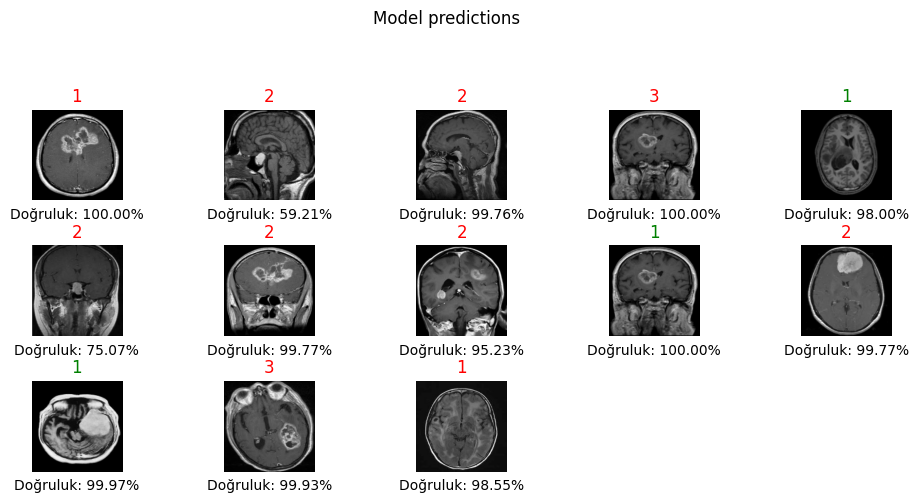

In [35]:
import matplotlib.pyplot as plt

# Assuming you have a list containing the predicted labels, e.g., predicted_labels_list
# You can create this list by predicting labels using the trained model on the validation_dataset

fig = plt.figure(figsize=(12, 10))  # Adjust the figure size here (width=12 inches, height=10 inches)
plt.subplots_adjust(hspace=0.5)

for n, (image, label) in enumerate(validation_dataset.take(30)):
    ax = plt.subplot(6, 5, n + 1)
    ax.imshow(image[0].numpy().astype("uint8"))  # Assuming the batch size is 1 (single image)
    predicted_label = pred_labels[n]
    true_label = validation_labels[n]  # Convert the one-hot encoded label to an integer
    if true_label == predicted_label:
        color = 'green'
    else:
        color = 'red'

    ax.set_title(predicted_label,color=color)  # Use predicted_label directly as the title
    ax.axis('off')

    ax.text(0.5, -0.2, f'Doğruluk: {prediction_probabilities[n]*100:.2f}%',
            transform=ax.transAxes, ha='center', fontsize=10)

_ = plt.suptitle("Model predictions")
plt.show()


RESNET50

In [36]:
from tensorflow.keras.layers import Input
resnet50_model = tf.keras.applications.resnet50.ResNet50(
    include_top=True,
    weights='imagenet',
    input_tensor=Input(shape=(160, 160, 3))
)

102967424/102967424 [==============================] - 6s 0us/step


In [37]:
inputs_one = tf.keras.Input(shape=(160, 160, 3))
y = data_augmentation(inputs_one)
y = preprocess_input(y)
y = resnet50_model(y, training=False)
y = tf.expand_dims(y, axis=1)
y = tf.keras.layers.GlobalAveragePooling1D()(y)

y = tf.keras.layers.Dropout(0.2)(y)
outputs_one = tf.keras.layers.Dense(4, activation='softmax')(y)
resnet50_model_modified = tf.keras.Model(inputs_one, outputs_one)


In [38]:
resnet50_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [39]:
history_resnet = resnet50_model.fit(train_dataset,
                    epochs=initial_epochs,
                    validation_data=validation_dataset)

Epoch 1/10
90/90 [==============================] - 62s 236ms/step - loss: 1.3003 - accuracy: 0.7760 - val_loss: 1.7364 - val_accuracy: 0.6853
Epoch 2/10
90/90 [==============================] - 19s 206ms/step - loss: 0.0697 - accuracy: 0.9815 - val_loss: 1.3616 - val_accuracy: 0.7538
Epoch 3/10
90/90 [==============================] - 18s 197ms/step - loss: 0.0251 - accuracy: 0.9895 - val_loss: 2.4178 - val_accuracy: 0.6269
Epoch 4/10
90/90 [==============================] - 18s 200ms/step - loss: 0.0153 - accuracy: 0.9951 - val_loss: 1.8276 - val_accuracy: 0.7335
Epoch 5/10
90/90 [==============================] - 18s 196ms/step - loss: 0.0100 - accuracy: 0.9972 - val_loss: 2.1420 - val_accuracy: 0.7132
Epoch 6/10
90/90 [==============================] - 18s 202ms/step - loss: 0.0075 - accuracy: 0.9990 - val_loss: 1.7387 - val_accuracy: 0.7665
Epoch 7/10
90/90 [==============================] - 18s 197ms/step - loss: 0.0113 - accuracy: 0.9951 - val_loss: 1.9044 - val_accuracy: 0.7893

In [40]:
resnet50_model.evaluate(validation_dataset)

13/13 [==============================] - 1s 57ms/step - loss: 2.4088 - accuracy: 0.7640


[2.408841371536255, 0.7639594078063965]

In [41]:
resnet50_predictions = resnet50_model.predict(validation_dataset)

13/13 [==============================] - 2s 53ms/step


In [42]:
resnet_prediction_probability = []
resnet_pred_labels = []
for i in resnet50_predictions:
  a = np.argmax(i)
  resnet_prediction_probability.append(a)

for i in resnet50_predictions:
  resnet_pred_labels.append(np.argmax(i))

In [43]:
#Predictions
resnet_prediction_probabilities = []
resnet_predictions= resnet50_model.predict(validation_dataset)
# test_images üzerinde tahmin yapın
resnet_predicted_labels = [class_names[np.argmax(pred)] for pred in resnet50_predictions]  # En yüksek olasılığa sahip sınıfın ismini al

# Model doğruluk değerini hesaplama
resnet_accuracy = resnet50_model.evaluate(validation_dataset)[1]

13/13 [==============================] - 1s 56ms/step - loss: 2.4088 - accuracy: 0.7640


In [ ]:
for i in resnet50_predictions:
  print(i)
  resnet_prediction_probabilities.append(i[np.argmax(i)])

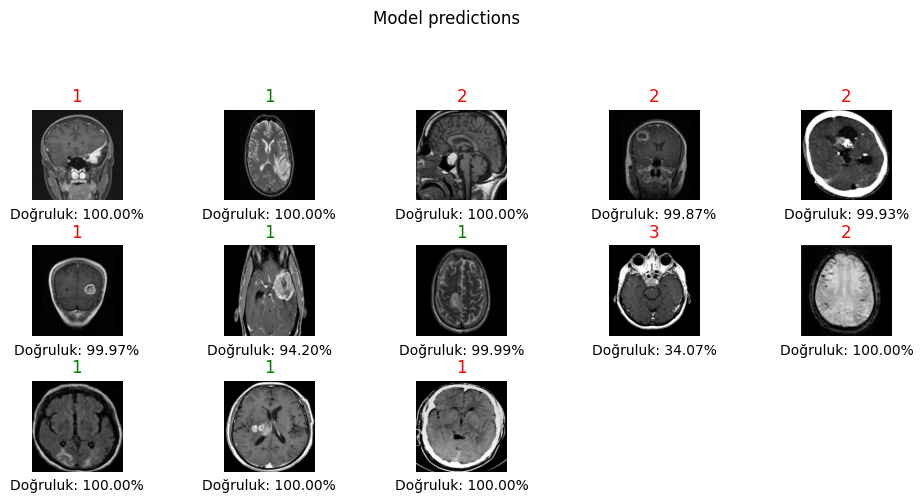

In [45]:
import matplotlib.pyplot as plt

# Assuming you have a list containing the predicted labels, e.g., predicted_labels_list
# You can create this list by predicting labels using the trained model on the validation_dataset

fig = plt.figure(figsize=(12, 10))  # Adjust the figure size here (width=12 inches, height=10 inches)
plt.subplots_adjust(hspace=0.5)

for n, (image, label) in enumerate(validation_dataset.take(30)):
    ax = plt.subplot(6, 5, n + 1)
    ax.imshow(image[0].numpy().astype("uint8"))  # Assuming the batch size is 1 (single image)
    resnet_predicted_label = resnet_pred_labels[n]
    resnet_true_label = validation_labels[n]  # Convert the one-hot encoded label to an integer
    if resnet_true_label == resnet_predicted_label:
        color = 'green'
    else:
        color = 'red'

    ax.set_title(resnet_predicted_label,color=color)  # Use predicted_label directly as the title
    ax.axis('off')

    ax.text(0.5, -0.2, f'Doğruluk: {resnet_prediction_probabilities[n]*100:.2f}%',
            transform=ax.transAxes, ha='center', fontsize=10)

_ = plt.suptitle("Model predictions")
plt.show()


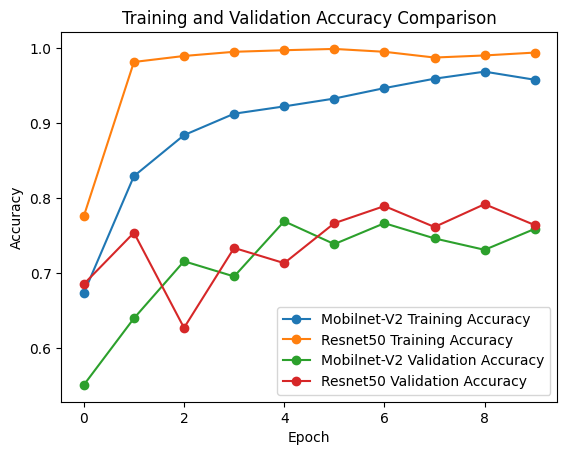

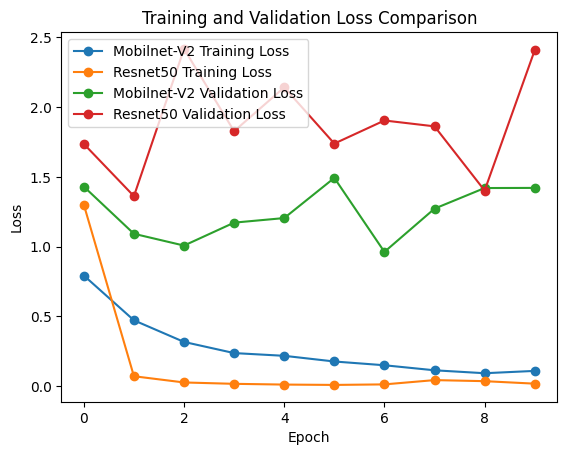

In [46]:
import matplotlib.pyplot as plt
#Doğruluk değerleri için
plt.plot(history.history['accuracy'], label='Mobilnet-V2 Training Accuracy', linestyle='-', marker='o')
plt.plot(history_resnet.history['accuracy'], label='Resnet50 Training Accuracy', linestyle='-', marker='o')

plt.plot(history.history['val_accuracy'], label='Mobilnet-V2 Validation Accuracy', linestyle='-', marker='o')
plt.plot(history_resnet.history['val_accuracy'], label='Resnet50 Validation Accuracy', linestyle='-', marker='o')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy Comparison')
plt.show()

#loss değerleri için

plt.plot(history.history['loss'], label='Mobilnet-V2 Training Loss', linestyle='-', marker='o')
plt.plot(history_resnet.history['loss'], label='Resnet50 Training Loss', linestyle='-', marker='o')


plt.plot(history.history['val_loss'], label='Mobilnet-V2 Validation Loss', linestyle='-', marker='o')
plt.plot(history_resnet.history['val_loss'], label='Resnet50 Validation Loss', linestyle='-', marker='o')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss Comparison')
plt.show()


**EFFİCİENTNET**

In [47]:
efficientnet_model = tf.keras.applications.efficientnet_v2.EfficientNetV2L(input_shape=(160, 160, 3), include_top=False, weights='imagenet')


473176280/473176280 [==============================] - 23s 0us/step


In [48]:
inputs_two = tf.keras.Input(shape=(160, 160, 3))
z = data_augmentation(inputs_two)
z = preprocess_input(z)
z = efficientnet_model(z, training=False)
z = tf.keras.layers.GlobalAveragePooling2D()(z)
z = tf.keras.layers.Dropout(0.2)(z)
outputs_two = tf.keras.layers.Dense(4, activation='softmax')(z)

efficientnet_model_modified = tf.keras.Model(inputs_two, outputs_two)

In [49]:
efficientnet_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [50]:
import tensorflow as tf
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dropout, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Önceden eğitilmiş EfficientNetV2 modelini yükleyin
efficientnet_model = tf.keras.applications.efficientnet_v2.EfficientNetV2L( include_top=False, weights='imagenet')

# Model girişi oluşturun
inputs_two = Input(shape=(160, 160, 3))
z = data_augmentation(inputs_two)
z = preprocess_input(z)
z = efficientnet_model(z, training=False)
z = GlobalAveragePooling2D()(z)
z = Dropout(0.2)(z)
outputs_two = Dense(4, activation='softmax')(z)

# Yeni modeli oluşturun
efficientnet_model_modified = Model(inputs_two, outputs_two)




In [51]:
# Modeli derleyin
base_learning_rate = 0.0001
efficientnet_model_modified.compile(
    optimizer=Adam(learning_rate=base_learning_rate),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)


In [52]:
# Modeli eğitin
history_efficientnet = efficientnet_model_modified.fit(
    train_dataset,
    epochs=initial_epochs,
    validation_data=validation_dataset
)


Epoch 1/10
90/90 [==============================] - 288s 1s/step - loss: 0.9819 - accuracy: 0.5676 - val_loss: 1.4075 - val_accuracy: 0.6117
Epoch 2/10
90/90 [==============================] - 81s 897ms/step - loss: 0.4192 - accuracy: 0.8519 - val_loss: 1.4549 - val_accuracy: 0.6980
Epoch 3/10
90/90 [==============================] - 81s 897ms/step - loss: 0.2713 - accuracy: 0.9108 - val_loss: 1.3644 - val_accuracy: 0.7208
Epoch 4/10
90/90 [==============================] - 83s 920ms/step - loss: 0.2155 - accuracy: 0.9240 - val_loss: 1.5403 - val_accuracy: 0.7132
Epoch 5/10
90/90 [==============================] - 83s 923ms/step - loss: 0.1868 - accuracy: 0.9380 - val_loss: 1.4992 - val_accuracy: 0.7259
Epoch 6/10
90/90 [==============================] - 81s 897ms/step - loss: 0.1499 - accuracy: 0.9467 - val_loss: 1.5146 - val_accuracy: 0.7081
Epoch 7/10
90/90 [==============================] - 81s 895ms/step - loss: 0.1453 - accuracy: 0.9526 - val_loss: 1.5552 - val_accuracy: 0.7589
E

In [53]:
efficientnet_model_accuracy = efficientnet_model_modified.evaluate(validation_dataset)

13/13 [==============================] - 3s 209ms/step - loss: 1.6608 - accuracy: 0.7665


In [54]:
efficientnet_model_predictions = efficientnet_model.predict(validation_dataset)

13/13 [==============================] - 9s 200ms/step


In [ ]:
efficientnet_model_predictions

In [59]:
efficientnet_prediction_probability = []
efficientnet_pred_labels = []
for i in efficientnet_model_predictions:
  a = np.argmax(i)
  efficientnet_prediction_probability.append(a)

for i in efficientnet_model_predictions:
  efficientnet_pred_labels.append(np.argmax(i))

In [63]:
efficientnet_probabilities = []
efficientnet_predictions= model.predict(validation_dataset)
efficientnet_predictions
# test_images üzerinde tahmin yapın
efficientnet_predictions_labels = [class_names[np.argmax(pred)] for pred in predictions]  # En yüksek olasılığa sahip sınıfın ismini al

# Model doğruluk değerini hesaplama
accuracy = model.evaluate(validation_dataset)[1]

13/13 [==============================] - 1s 29ms/step - loss: 1.4208 - accuracy: 0.7589


In [ ]:
efficientnet_prediction_probability

In [ ]:
efficientnet_pred_labels

In [ ]:
validation_labels

In [72]:
efficientnet_pred_labels = [class_names[np.argmax(pred)] for pred in predictions]

meningioma_tumor
no_tumor
no_tumor
no_tumor
meningioma_tumor
no_tumor
no_tumor
no_tumor
meningioma_tumor
no_tumor
no_tumor
meningioma_tumor
pituitary_tumor


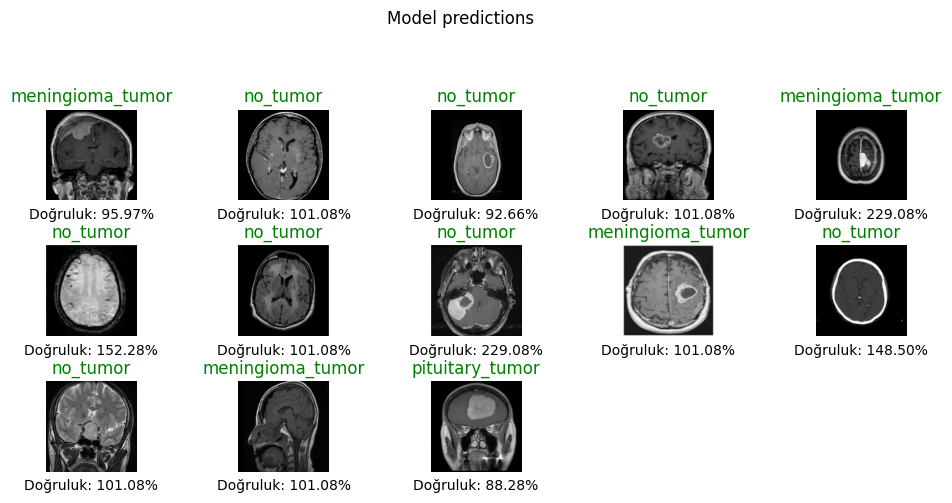

In [75]:
import matplotlib.pyplot as plt

# Assuming you have a list containing the predicted labels, e.g., predicted_labels_list
# You can create this list by predicting labels using the trained model on the validation_dataset

fig = plt.figure(figsize=(12, 10))  # Adjust the figure size here (width=12 inches, height=10 inches)
plt.subplots_adjust(hspace=0.5)

for n, (image, label) in enumerate(validation_dataset.take(30)):
    ax = plt.subplot(6, 5, n + 1)
    ax.imshow(image[0].numpy().astype("uint8"))  # Assuming the batch size is 1 (single image)
    efficientnet_pred_label = efficientnet_predictions_labels[n]
    true_label = efficientnet_pred_labels[n]  # Convert the one-hot encoded label to an integer
    print(true_label)
    if true_label == efficientnet_pred_label:
        color = 'green'
    else:
        color = 'red'

    ax.set_title(efficientnet_pred_label,color=color)  # Use predicted_label directly as the title
    ax.axis('off')

    ax.text(0.5, -0.2, f'Doğruluk: {efficientnet_prediction_probability[n]/100:.2f}%',
            transform=ax.transAxes, ha='center', fontsize=10)

_ = plt.suptitle("Model predictions")
plt.show()


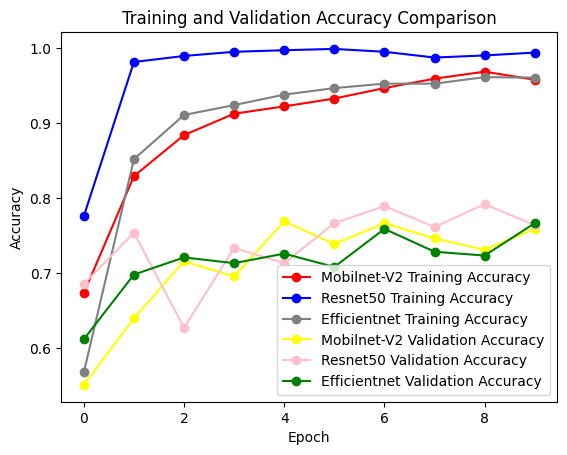

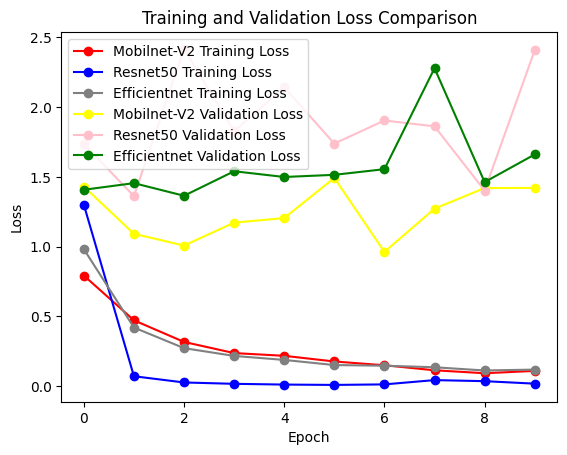

In [79]:
import matplotlib.pyplot as plt
#Doğruluk değerleri için
plt.plot(history.history['accuracy'], label='Mobilnet-V2 Training Accuracy', linestyle='-', marker='o',color="red")
plt.plot(history_resnet.history['accuracy'], label='Resnet50 Training Accuracy', linestyle='-', marker='o',color="blue")
plt.plot(history_efficientnet.history['accuracy'], label='Efficientnet Training Accuracy', linestyle='-', marker='o',color="gray")

plt.plot(history.history['val_accuracy'], label='Mobilnet-V2 Validation Accuracy', linestyle='-', marker='o',color="yellow")
plt.plot(history_resnet.history['val_accuracy'], label='Resnet50 Validation Accuracy', linestyle='-', marker='o',color="pink")
plt.plot(history_efficientnet.history['val_accuracy'], label='Efficientnet Validation Accuracy', linestyle='-', marker='o',color="green")



plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy Comparison')
plt.show()

#loss değerleri için

plt.plot(history.history['loss'], label='Mobilnet-V2 Training Loss', linestyle='-', marker='o',color="red")
plt.plot(history_resnet.history['loss'], label='Resnet50 Training Loss', linestyle='-', marker='o',color="blue")
plt.plot(history_efficientnet.history['loss'], label='Efficientnet Training Loss ', linestyle='-', marker='o',color="gray")


plt.plot(history.history['val_loss'], label='Mobilnet-V2 Validation Loss', linestyle='-', marker='o',color="yellow")
plt.plot(history_resnet.history['val_loss'], label='Resnet50 Validation Loss', linestyle='-', marker='o',color="pink")
plt.plot(history_efficientnet.history['val_loss'], label='Efficientnet Validation Loss', linestyle='-', marker='o',color="green")





plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss Comparison')
plt.show()
